In [2]:
def hint(string): return print(''.join(map(chr, map(lambda x: int(x, 16), string.split('.')))))

## Environment
+ Pycharm
+ python3.6
+ networkx
+ jieba
+ numpy, pandas, matplotlib
+ gensim

## References

+ https://nlp.stanford.edu/pubs/see2017get.pdf
+ https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf
+ https://openreview.net/pdf?id=SyK00v5xx
+ https://arxiv.org/abs/1409.0473
+ 

## Background Knowledge

Q1. 简述自动摘要技术的三个应用场景？

回答:

1.新闻提取
    
2.搜索引擎
    
3.汇报文档

##### 提示，如果需要帮助，可以运行以下的提示

In [6]:
# remove the # before hint(), to show the example sulution
# hint('a.641c.7d22.5f15.64ce.ff1b.a.32.2e.20.89c2.70b9.62bd.53d6.ff1b.a.33.2e.20.65b0.95fb.ff1b.a.34.2e.20.6c47.62a5.6587.6863.a')

Q2. 目前的摘要技术分为哪两类？

回答：抽取式（extractive），另一种是生成式（abstractive）。

抽取式是根据词语重要性、句子重要性排序，抽取出重要度高的句子，从而形成摘要。主要是对文本的选择，过程相对更容易，但是对于复杂的文本时，很难仅仅通过选择文本来形成摘要，如小说。

生成式则是通过自然语言处理，输出简洁、流畅、保留关键信息，更像人进行摘要的过程，涉及到生成文本，过程更为复杂。但生成能力更强，可认为有一定的概括能力。


In [8]:
# hint('a.6458.8981.20.41.62.73.74.72.61.63.74.69.76.65.3a.20.91cd.65b0.6574.7406.4fe1.606f.a.62bd.53d6.20.45.78.74.72.61.63.74.69.76.65.3a.20.4ece.539f.6587.4e2d.63d0.53d6.90e8.5206.a')

Q3. 目前实现自动摘要的难点在哪里？列出三点。

In [9]:
hint('a.31.2e.20.7f3a.4e4f.6807.6ce8.8bad.7ec3.6570.636e.ff1b.a.32.2e.20.57fa.4e8e.6587.672c.7406.89e3.ff0c.63d0.53d6.91cd.8981.5185.5bb9.96be.ff1b.a.33.2e.20.4eba.7c7b.5bf9.6587.672c.903b.8f91.654f.611f.ff0c.6458.8981.7ed3.679c.5bb9.9519.7387.4f4e.a')


1. 缺乏标注训练数据；
2. 基于文本理解，提取重要内容难；
3. 人类对文本逻辑敏感，摘要结果容错率低



## Basic Technologies

Q4. 什么是PageRank？ PageRank 用在什么地方？用 $Latex$ 写出其方程

回答： 

PageRank，网页排名，又称网页级别、Google左侧排名或佩奇排名，是一种由根据网页之间相互的超链接计算的技术，而作为网页排名的要素之一，以Google公司创办人拉里·佩奇（Larry Page）之姓来命名。Google用它来体现网页的相关性和重要性，在搜索引擎优化操作中是经常被用来评估网页优化的成效因素之一。Google的创始人拉里·佩奇和谢尔盖·布林于1998年在斯坦福大学发明了这项技术。

方程：
$$ PR(p_i) = \alpha \sum_{p_j \in M_pi}\frac{PR(p_j)}{L(p_j)}+\frac{(1-\alpha)}{N}$$
其中Mpi是所有对pi网页有出链的网页集合，L(pj)是网页pj的出链数目，N是网页总数，α一般取0.85。

In [6]:
# hint('a.31.2e.20.65b9.7a0b.3a.a.20.20.20.20.50.52.28.70.5f.69.29.20.3d.20.a.72.61.63.7b.31.2d.64.7d.7b.4e.7d.20.2b.20.64.20.5c.73.75.6d.5f.7b.70.5f.6a.20.5c.69.6e.20.4d.28.70.5f.69.29.7d.20.a.72.61.63.7b.50.52.20.28.70.5f.6a.29.7d.7b.4c.28.70.5f.6a.29.7d.a.32.2e.20.53c2.8003.ff1a.a.20.20.20.20.68.74.74.70.73.3a.2f.2f.77.77.77.2e.77.69.6b.69.77.61.6e.64.2e.63.6f.6d.2f.65.6e.2f.50.61.67.65.52.61.6e.6b.a')

Q5. PageRank和TextRank的关系是什么，TextRank的背景原理是什么？ 

回答：

原理相同，应用背景不同。

在google的pagerank在citation analysis, social networks, and the analysis of the link-structure of the World Wide Web得到了成功应用，便将这种方法应用到自然语言处理中。

In [8]:
# hint('a.53c2.8003.8bba.6587.ff1a.20.68.74.74.70.73.3a.2f.2f.77.65.62.2e.65.65.63.73.2e.75.6d.69.63.68.2e.65.64.75.2f.7e.6d.69.68.61.6c.63.65.61.2f.70.61.70.65.72.73.2f.6d.69.68.61.6c.63.65.61.2e.65.6d.6e.6c.70.30.34.2e.70.64.66.a')

Q6. 在存在大量原始文本以及该文本对应的摘要内容时，我们是否可以使用 Seq2Seq 进行生成？ Sequence2Sequence的原理是什么？ Attention的机制原理是什么？ 

可以

 Sequence2Sequence的原理：参考https://www.cnblogs.com/DLlearning/p/7834018.html
 
 seq2seq模型是以编码（Encode）和解码（Decode）为代表的架构方式，seq2seq模型是根据输入序列X来生成输出序列Y，在翻译，文本自动摘要和机器人自动问答以及一些回归预测任务上有着广泛的运用。以encode和decode为代表的seq2seq模型，encode意思是将输入序列转化成一个固定长度的向量，decode意思是将输入的固定长度向量解码成输出序列。

<img src='encode_and_decode.png'>

上图为seq2seq的encode和decode结构，采用CNN/LSTM模型。在RNN中，当前时间的隐藏状态是由上一时间的状态和当前时间的输入x共同决定的，即
$$h_t=f(h_{t-1},x_t)$$

[编码阶段]
得到各个隐藏层的输出然后汇总，生成语义向量
$$C = q(h_1,h_2,h_3,...,h_T_x)$$
也可以将最后的一层隐藏层的输出作为语义向量C 
$$C = q(h_1,h_2,h_3,...,h_T_x)=h_T_x$$

[解码阶段]
这个阶段，我们要根据给定的语义向量C和输出序列y1,y2,…yt−1来预测下一个输出的单词yt，即
$$y_t=argmaxP(y_t)=\prod_{t=1}^Tp(y_t|\{y_1,...,y_{t-1}\},C)$$

Attention的机制原理：

encoder部分采用一个单层双向LSTM，输入原文的词向量序列，输出一个编码后的隐层状态序列h_i；

decoder部分采用一个单层单向LSTM，每一步的输入是前一步预测的词的词向量，同时输出一个解码的状态序列s_t,用于当前步的预测。

attention是针对原文的概率分布，目的在于告诉模型在当前步的预测过程中，原文中的哪些词更重要，具体的计算公式为：
$$e^t_i=v^Ttanh(W_hh_i+W_ss_t+b_attn)$$
$$a^t=softmax(e^t)$$


### Extractive, Abstractive 
+ Extractive是从文中找出关键信息，然后拼接进行结果输出
    + 确定重要信息
+ Abstracrtive: 依据文本的输入，生产单词（可能是新的单词）进行结果输出
    + Seq2Seq的问题
    + Transfomer

## Data Pipeline

我们首先加载数据

In [22]:
import pandas as pd
import numpy as np
import jieba
import os

def cut(string): return ' '.join(jieba.cut(string))
path_root = 'D:\Github_project\data'
news_file = os.path.join(path_root, 'sqlResult_1558435.csv') 
# this file could downloaded from github group's : 
#  https://github.com/Artificial-Intelligence-for-NLP-Chinese/datasource 

In [23]:
news_content = pd.read_csv(news_file, encoding='gb18030')
news_content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


然后进行：
    1. 把content这一列全部拿出来
    2. 对content进行切词
    3. 统计单词出现的频率格式
    4. 其他的分析
`提示`：相关代码可以在Github Group的Slides里边的Lecture18，自动摘要里边看到。 

In [24]:
news_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89611 entries, 0 to 89610
Data columns (total 7 columns):
id         89611 non-null int64
author     79396 non-null object
source     89609 non-null object
content    87054 non-null object
feature    89611 non-null object
title      89577 non-null object
url        87144 non-null object
dtypes: int64(1), object(6)
memory usage: 4.8+ MB


In [25]:
news_content.dropna(subset=['content'], inplace=True)

In [26]:
news_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87054 entries, 0 to 89610
Data columns (total 7 columns):
id         87054 non-null int64
author     76925 non-null object
source     87052 non-null object
content    87054 non-null object
feature    87054 non-null object
title      87054 non-null object
url        87054 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [27]:
news_content.drop_duplicates(subset=['content'], inplace=True)

In [28]:
news_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74917 entries, 0 to 89610
Data columns (total 7 columns):
id         74917 non-null int64
author     65165 non-null object
source     74915 non-null object
content    74917 non-null object
feature    74917 non-null object
title      74917 non-null object
url        74917 non-null object
dtypes: int64(1), object(6)
memory usage: 4.6+ MB


In [29]:
import re
def token(string):return re.findall(r'[\d|\w]+', string)

In [30]:
token('这是一个测试78432\n\n\n')

['这是一个测试78432']

In [31]:
news_content['content'][0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [35]:
news_content_cut = [token(n) for n in news_content['content']]

In [36]:
news_content_cut = [' '.join(n) for n in news_content_cut]

In [37]:
news_content_cut = [cut(n) for n in news_content_cut]

In [38]:
news_content_cut[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [149]:
news_content_cut[0].split()

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日',
 '起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI',
 '9',
 '的',
 '研发',
 '之中',
 'MIUI',
 '8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI',
 '9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息']

In [150]:
from collections import Counter

In [151]:
words = []
for document in news_content_cut:
    words += [w for w in document.split()]

In [152]:
len(words)

17021711

In [153]:
words_counter = Counter(words)

In [154]:
words_counter

Counter({'此外': 4203,
         '自': 4714,
         '本周': 478,
         '6': 33427,
         '月': 164547,
         '12': 10105,
         '日': 144880,
         '起': 5142,
         '除': 1347,
         '小米': 286,
         '手机': 2963,
         '等': 56593,
         '15': 8314,
         '款': 673,
         '机型': 138,
         '外': 3187,
         '其余': 469,
         '已': 20474,
         '暂停': 831,
         '更新': 603,
         '发布': 7529,
         '含': 692,
         '开发': 3836,
         '版': 889,
         '体验版': 1,
         '内测': 6,
         '稳定版': 1,
         '暂不受': 1,
         '影响': 7980,
         '以': 36767,
         '确保': 2814,
         '工程师': 519,
         '可以': 13076,
         '集中': 2833,
         '全部': 3675,
         '精力': 259,
         '进行': 24627,
         '系统优化': 1,
         '工作': 20229,
         '有人': 1814,
         '猜测': 206,
         '这': 22375,
         '也': 46626,
         '是': 97396,
         '将': 59647,
         '主要': 9517,
         '用到': 41,
         'MIUI': 5,
         '9': 125

In [155]:
sorted(words_counter, key=lambda x:words_counter[x], reverse=True)

['的',
 'n',
 '在',
 '月',
 '日',
 '和',
 '了',
 '新华社',
 '年',
 '是',
 '１',
 '０',
 '中',
 '２',
 '中国',
 '2017',
 '外代',
 '记者',
 '将',
 '5',
 '等',
 '与',
 '为',
 '4',
 '二线',
 '对',
 '也',
 '有',
 '上',
 '照片',
 '５',
 '说',
 '以',
 '３',
 '发展',
 '他',
 '４',
 '国际',
 '6',
 '1',
 '3',
 '2',
 '６',
 '人',
 '到',
 '比赛',
 '从',
 '不',
 '后',
 '都',
 '就',
 '７',
 '并',
 '企业',
 '国家',
 '体育',
 '被',
 '进行',
 '北京',
 '当日',
 '美国',
 '但',
 '新',
 '个',
 '这',
 '举行',
 '足球',
 '表示',
 '比',
 '９',
 '经济',
 '我',
 '还',
 '合作',
 '一个',
 '要',
 '８',
 '已',
 '工作',
 '摄',
 '我们',
 '完',
 '一路',
 '市场',
 '一带',
 '时',
 '让',
 '日电',
 '建设',
 '多',
 '通过',
 '下',
 '问题',
 '而',
 '大',
 '更',
 '会',
 '公司',
 '项目',
 'n5',
 '选手',
 '目前',
 '于',
 'n4',
 '2016',
 '世界',
 '7',
 '联赛',
 '向',
 '活动',
 '成为',
 '10',
 '球员',
 '服务',
 '队',
 '社会',
 '8',
 '没有',
 '全国',
 '重要',
 '自己',
 '他们',
 '今年',
 '着',
 '前',
 '晋级',
 '文化',
 '可以',
 '第',
 '她',
 '及',
 '由',
 '地',
 '9',
 '创新',
 '技术',
 '已经',
 '能',
 '城市',
 '提供',
 '好',
 '把',
 '投资',
 '认为',
 '其',
 '相关',
 '实现',
 '战胜',
 '总统',
 '政府',
 '一',
 '决赛',
 '0',
 '研究',
 

In [182]:
words_counter_sorted = sorted(words_counter.items(), key=lambda x:x[, reverse=True)

In [183]:
words_counter_sorted

[('的', 679567),
 ('n', 572544),
 ('在', 245384),
 ('月', 164547),
 ('日', 144880),
 ('和', 130701),
 ('了', 119659),
 ('新华社', 118064),
 ('年', 110132),
 ('是', 97396),
 ('１', 87881),
 ('０', 84479),
 ('中', 74042),
 ('２', 70195),
 ('中国', 69793),
 ('2017', 65558),
 ('外代', 65295),
 ('记者', 60057),
 ('将', 59647),
 ('5', 56896),
 ('等', 56593),
 ('与', 56526),
 ('为', 56284),
 ('4', 53147),
 ('二线', 53072),
 ('对', 49686),
 ('也', 46626),
 ('有', 45699),
 ('上', 45300),
 ('照片', 40900),
 ('５', 40772),
 ('说', 39782),
 ('以', 36767),
 ('３', 36750),
 ('发展', 36712),
 ('他', 36697),
 ('４', 34557),
 ('国际', 34497),
 ('6', 33427),
 ('1', 32758),
 ('3', 31662),
 ('2', 31342),
 ('６', 30489),
 ('人', 29952),
 ('到', 29901),
 ('比赛', 29551),
 ('从', 28830),
 ('不', 28045),
 ('后', 27938),
 ('都', 27476),
 ('就', 26345),
 ('７', 26231),
 ('并', 26038),
 ('企业', 25821),
 ('国家', 25816),
 ('体育', 24888),
 ('被', 24744),
 ('进行', 24627),
 ('北京', 24177),
 ('当日', 24051),
 ('美国', 24051),
 ('但', 23093),
 ('新', 22948),
 ('个', 22442),
 ('这', 2237

In [158]:
words_frequences_sorted = [words_counter[1]/len(words) for words_counter in words_counter_sorted]

In [159]:
words_frequences_sorted

[0.03992354235129477,
 0.033636101564642945,
 0.014415942087138008,
 0.009666889538895355,
 0.008511482776320195,
 0.007678487785393607,
 0.007029786841052583,
 0.006936082982492183,
 0.0064700898752187725,
 0.00572186897075153,
 0.005162876986925698,
 0.004963014587663955,
 0.004349856486225151,
 0.00412385100416756,
 0.004100234106900299,
 0.0038514342065847553,
 0.0038359833509099056,
 0.0035282587044275396,
 0.0035041718191549604,
 0.0033425546938260203,
 0.0033247538981245775,
 0.003320817748580034,
 0.003306600611419146,
 0.0031223065648335823,
 0.0031179004272837204,
 0.0029189780040326145,
 0.0027392075919982425,
 0.0026847477318819478,
 0.0026613070801166814,
 0.002402813677191441,
 0.002395293869106343,
 0.002337132853448164,
 0.0021600061239437094,
 0.0021590073994324074,
 0.0021567749564071438,
 0.0021558937288971712,
 0.002030171937474441,
 0.002026647027434551,
 0.0019637861317231857,
 0.0019244833847784162,
 0.0018600950280497654,
 0.0018412955078370207,
 0.0017911830367

In [160]:
X = range(len(words_frequences_sorted))

In [161]:
import matplotlib.pyplot as plt

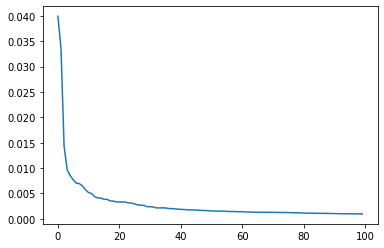

In [162]:
plt.plot(X[:100], words_frequences_sorted[:100])

## 使用TextRank进行自动摘要提取

#### Task 1 使用neteworkx包，建立一个随机图，对该图进行PageRank分析


In [1]:
#hints: 代码可以在Github Group 中看到
import networkx as nx
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2)])

C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


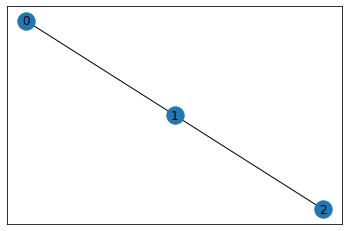

In [168]:
nx.draw_networkx(G)

In [175]:
e = zip(range(2, 4), range(4, 6))
G.add_edges_from(e)

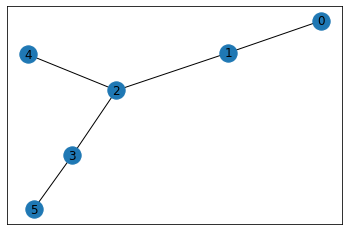

In [176]:
nx.draw_networkx(G)

In [190]:
G.add_edges_from([(3,5)], weight=10)

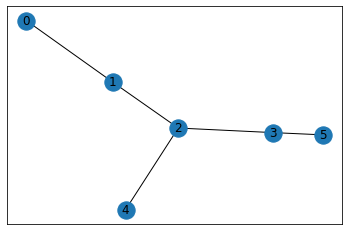

In [191]:
nx.draw_networkx(G)

In [192]:
ranking_result = nx.pagerank(G)

In [193]:
sorted(ranking_result.items(), key=lambda x:x[1],reverse=True)

[(3, 0.29014528233310277),
 (2, 0.22686231950895105),
 (5, 0.21470976488215102),
 (1, 0.15730704240235),
 (0, 0.05842791560889785),
 (4, 0.05254767526454705)]

#### Task 2 使用PageRank 对文本进行关联分析

#### 1.textrank找关键词，未加停用词，实际应用可加入停用词，效果更好

In [46]:
#hints: 代码可以在Github Group 中看到
def get_connect_graph_by_text_rank(tokenized_text: str, window=2):
    keywords_graph = nx.Graph()
    tokeners = tokenized_text.split()
    for ii, t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t) 
                       for connect in range(ii-window, ii+window+1) 
                       if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)

    return keywords_graph

In [47]:
keywords_graph = get_connect_graph_by_text_rank(news_content_cut[0])

C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


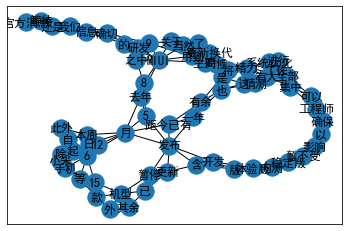

In [48]:
nx.draw_networkx(keywords_graph, note_size=10)

In [49]:
keywords_rank = nx.pagerank(keywords_graph)

In [50]:
sorted(keywords_rank.items(), key=lambda x:x[1],reverse=True)

[('MIUI', 0.025866698785978005),
 ('6', 0.023083153793145017),
 ('发布', 0.02224554400184492),
 ('月', 0.022144575797209506),
 ('精力', 0.02200551338492073),
 ('也', 0.01963878787264618),
 ('是', 0.019475357335891917),
 ('机型', 0.01897095279746639),
 ('的', 0.017473191716918336),
 ('9', 0.017228484482222913),
 ('还是', 0.015591313382353887),
 ('我们', 0.014898245545728403),
 ('暂不受', 0.014343662348924901),
 ('影响', 0.014341545989082223),
 ('本周', 0.014337764608744183),
 ('稳定版', 0.014317845230635128),
 ('以', 0.014311011807750754),
 ('内测', 0.014266580006963545),
 ('确保', 0.014253911032555175),
 ('信息', 0.01421986533074685),
 ('体验版', 0.014159734731361916),
 ('工程师', 0.014138419460112484),
 ('款', 0.014079791527858895),
 ('版', 0.0140408632261911),
 ('已', 0.014016499720016142),
 ('可以', 0.014008349790283568),
 ('除', 0.013819219556689827),
 ('起', 0.013760590379656105),
 ('等', 0.01374618743059326),
 ('15', 0.013721160678866293),
 ('开发', 0.013716282236561718),
 ('小米', 0.013700511661152987),
 ('手机', 0.0136981757115

Q6. 切句子是如何实现的？如何使用正则表达式进行句子分割？ 

回答：

In [195]:
# hint('a.70.61.74.74.65.72.6e.20.3d.20.72.65.2e.63.6f.6d.70.69.6c.65.28.27.5b.3002.ff0c.2c.2e.5d.ff1a.27.29.a.73.70.6c.69.74.20.3d.20.70.61.74.74.65.72.6e.2e.73.75.62.28.27.20.27.2c.20.73.65.6e.74.65.6e.63.65.29.2e.73.70.6c.69.74.28.29.20.20.23.20.73.70.6c.69.74.20.73.65.6e.74.65.6e.63.65.a')

Q7. 如果对切词之后的句子的标点符号进行恢复？

回答：

In [ ]:
#hint('a.63d0.793a.ff1a.5efa.7acb.53e5.5b50.548c.6807.70b9.7b26.53f7.4e4b.95f4.7684.5173.7cfb.ff0c.4f8b.5982.ff0c.5efa.7acb.4e00.4e2a.5b57.5178.a')

#### Task3 在Pycharm里边合并代码，合并成一个单独的函数，实现输入一篇文章，输出该文本的摘要流程

`Jupyter Notebook`里边适合做中间结果的记录以及想法验证，真正开发还是要在Pycharm等集成IDE里边进行

## 使用词向量进行自动摘要

Q8. 使用词向量进行自动摘要的基本假设是什么？ 

回答:

In [ ]:
#hint('a.53e5.5b50.5411.91cf.80fd.591f.8861.91cf.53e5.5b50.4e4b.95f4.7684.76f8.4f3c.5ea6.ff0c.6545.800c.53ef.4ee5.901a.8fc7.8be5.65b9.6cd5.5224.65ad.67d0.4e2a.53e5.5b50.662f.5426.548c.6587.672c.542b.4e49.76f8.5173.a')

#### Task4. 使用普林斯顿2017年的sentence embedding方法，进行句子embedding的构建

Q9. 该句子embedding的原理是什么，有什么优势？ 

回答：

In [ ]:
#hint('a.63d0.793a.ff1a.9891.7387.ff0c.91cd.8981.6027.ff0c.5feb.901f.ff0c.6027.80fd.597d.a')

Q10. embedding是什么？ 用数学的方式解释embedding。

回答：

In [ ]:
#hint('a.63d0.793a.ff1a.5047.8bbe.4e24.4e2a.65.6e.74.69.74.79.4fdd.6301.5177.6709.67d0.79cd.201c.504f.5e8f.201d.7279.6027.ff0c.5373.ff0c.53ef.4ee5.6bd4.8f83.ff0c.90a3.4e48.ff0c.5c06.8fd9.4e24.4e2a.20.65.6e.74.69.74.79.20.6295.5f71.5230.53e6.5916.7684.7a7a.95f4.4e2d.ff0c.5728.8be5.7a7a.95f4.4e2d.ff0c.8fd9.79cd.201c.504f.5e8f.201d.4f9d.7136.80fd.591f.4fdd.6301.a')

Q11. 除了word embedding， sentence embedding， embedding还可以应用到哪些场景？

回答：

In [ ]:
#hint('a.4f8b.5982.793e.4ea4.7f51.7edc.91cc.8fb9.4eba.5458.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.597d.53cb.63a8.8350.ff09.ff0c.20.8d2d.7269.7f51.7ad9.5546.54c1.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.5546.54c1.63a8.8350.ff09.a.53e6.5916.ff0c.53ef.4ee5.601d.8003.4e00.4e0b.57fa.4e8e.8fd9.79cd.65.6d.62.65.64.64.69.6e.67.7684.63a8.8350.7684.4f18.70b9.5728.54ea.91cc.ff1f.20.a')

Q12. 这种embedding的方法和tfidf有何异同？ 

回答：

In [ ]:
#hint('a.63d0.793a.ff1a.74.66.69.64.66.8003.8651.7684.9891.7387.5176.20.74.66.20.548c.20.69.64.66.20.5206.522b.662f.4ec0.4e48.ff1f.20.8be5.65.6d.62.65.64.64.69.6e.67.7684.9891.7387.7c7b.4f3c.4e8e.4ec0.4e48.ff1f.20.a')

Q13. 构建句子想了的过程中，面对未知的单词，如果解决？

回答:

In [ ]:
#hint('a.5f00.53d1.578b.95ee.9898.ff0c.53ef.4ee5.7701.7565.ff0c.53ef.4ee5.8d4b.4e88.968f.673a.503c.ff0c.53ef.4ee5.7ed9.4e00.7279.5b9a.503c.ff0c.5177.4f53.60c5.51b5.9700.8981.7ecf.8fc7.8bd5.9a8c.8fdb.884c.5206.6790.a')

Q14. 构建完成句子向量之后，句子相似度如何判断？ 

回答：

In [ ]:
#hint('a.63.6f.73.69.6e.65.ff0c.20.4f59.5f26.8ddd.79bb.a')

Q15. 为什么要用cosine距离进行判断，为何不用欧几里得？ 

回答：

In [ ]:
#hint('a.63d0.793a.ff1a.8bf7.53c2.8003.77.6f.72.64.32.76.65.63.8bad.7ec3.65f6.5019.7684.7684.6982.7387.5206.5e03.7684.5b9a.4e49.ff0c.53ef.4ee5.770b.5230.5176.6c.6f.73.73.5f53.65f6.4f18.5316.7684.5c31.662f.20.65.78.70.28.76.31.20.2e.20.76.32.29.2c.20.90a3.4e48.5f53.20.76.31.20.2e.20.76.32.6700.5927.7684.65f6.5019.ff0c.a.5c31.662f.8fd9.4e24.4e2a.5411.91cf.65b9.5411.4e00.81f4.7684.65f6.5019.ff0c.6240.4ee5.ff0c.8be5.8bcd.5411.91cf.5728.8bad.7ec3.7684.65f6.5019.7684.6c.6f.73.73.7684.8861.91cf.ff0c.5c31.662f.4f9d.636e.65b9.5411.8fdb.884c.7684.3002.20.a')

In [ ]:
#hint('a.53e6.5916.ff0c.4e5f.4e0d.662f.4e0d.80fd.7528.6b27.51e0.91cc.5f97.ff0c.4f46.662f.4f9d.636e.4e0a.4e00.63d0.793a.4e4b.5206.6790.ff0c.6b27.51e0.91cc.5f97.662f.4e0d.80fd.5f88.597d.4fdd.6301.8bed.4e49.76f8.4f3c.6027.7684.3002.20.a')

Q16. cosine距离的时候，如果两个向量的长度区别很大，但是方向类似，cosine的距离是小还是大？ 

回答：

In [ ]:
#hint('63.6f.73.69.6e.65.53ea.8003.8651.201c.65b9.5411.201c.662f.5426.4e00.6837')

#### Task15 基于Sentene Embedding 在pycharm里边完成句子摘要的完整过程

Q17. 找出几个句子进行plot， 解释其与全文的相关性的排序

请阐述：

Q18. 不同类型的文章，例如时政，财经，社会，故事，其相关性分布有何区别？ 

请阐述：

In [ ]:
#hint('a.63d0.793a.ff1a.53ef.4ee5.4ece.5176.5206.5e03.7684.5bc6.5ea6.ff0c.5206.5e03.53d8.5316.7b49.8d8b.52bf.8fdb.884c.89c2.5bdf.3002.a')

## More Added Feature

### KNN思想

例如，当我们有一个列表是 [1, 1, 2, 3, 8, 1, 2]的时候，其中的 8 数值太大，这在我们的摘要中的表现为，该句子周围的句子都是不那么相关的，但是该句子单独的相关性很高。 那么，如果把这个句子摘录进来，就会导致“不通顺”. 我们可以采用KNN的思想，将这个列表进行重新计算，让它每一个元素的值，等于自己的值和周围的几个值的一个计算结果。 

Q19. 如何使用KNN思想进行“平滑”操作? 请代码实现

回答：

`请补全代码：`
```
L = []
def knn_smooth(): pass

```

In [ ]:
#hint('a.23.4e00.4e2a.53ef.4ee5.7684.73.6f.6c.75.74.69.6f.6e.662f.ff1a.a.a.4c.20.3d.20.5b.31.2c.20.32.2c.20.33.2c.20.34.2c.20.31.30.2c.20.31.2c.20.32.5d.a.77.69.6e.64.6f.77.20.3d.20.33.a.a.4c.20.3d.20.5b.6e.70.2e.6d.65.61.6e.28.4c.5b.69.2d.77.69.6e.64.6f.77.3a.69.2b.77.69.6e.64.6f.77.5d.29.20.66.6f.72.20.69.20.69.6e.20.72.61.6e.67.65.28.6c.65.6e.28.4c.29.29.5d.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.6e.70.2e.6d.65.61.6e.662f.4e00.79cd.6700.7b80.5355.7684.5e73.5747.5316.65b9.6cd5.ff0c.6211.4eec.8fd8.53ef.4ee5.8003.8651.5176.4ed6.7684.4f8b.5982.8ddd.79bb.52a0.6743.ff0c.7b49.65b9.6cd5.a')

### Title 标题

如果该文本有标题，那么标题可以帮助我们很多。在之前，我们计算每个句子与文章整体的相似度是对每个子句与整体文章进行相似度距离计算，那么，我们这个时候，就可以把标题的embedding结果拿出来，那么每句话的相似度就是这句话与整体文章的相似度和标题的相似度的一个“结合”。

Q20. 请代码实现这一思路。

回答：

In [ ]:
#hint('a.74.69.74.6c.65.20.3d.20.27.73.6f.6d.65.20.77.6f.72.64.73.27.a.63.6f.6e.74.65.6e.74.20.3d.20.27.6d.6f.72.65.20.61.6e.64.20.6d.6f.72.65.20.77.6f.72.64.73.27.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.74.69.74.6c.65.29.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.63.6f.6e.74.65.6e.74.29.a.23.5bf9.4e8e.4e00.4e2a.5b50.53e5.20.73.75.62.5f.73.65.6e.5f.6e.2c.20.4ee5.524d.7684.73.69.6d.69.6c.61.72.69.74.79.662f.20.63.6f.73.69.6e.65.28.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.73b0.5728.53ef.4ee5.662f.a.70.20.3d.20.30.2e.35.a.73.65.6e.5f.76.65.63.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.a.73.69.6d.69.6c.61.72.69.74.79.20.3d.20.70.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.29.20.2b.20.28.31.20.2d.20.70.29.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.70.4ee5.53ca.70.548c.63.6f.73.69.6e.65.7684.6784.5efa.90fd.662f.53ef.4ee5.53d8.5316.7684.3002.20.70.20.548c.20.31.2d.70.662f.7ebf.6027.5173.7cfb.ff0c.53ef.4ee5.662f.5176.4ed6.7684.5173.7cfb.3002.81ea.5df1.5b9a.5373.53ef.a')

### Keywords 关键字

对整篇文章提取关键字，该关键字可以通过TextRank或者tfidf或者gensim自带的包进行提取。 然后对包含了关键词的句子进行手动加权

#### Task 请代码实现

### Position 位置信息

对于句子而言，如果其出现在段落开端，结尾，是否是重要的？ 请做实验证明之，并且代码进行改进。 

#### Task 加入位置信息的考量

### Topic 主题信息

自学Gensim LDA的使用方法，对于文章获得其主题，然后依据主题对每个句子进行判断，每个句子是否和该主题相关。 
参考网站： 
1. Google Search： Gensim LDA
2. https://github.com/xiaoyichao/-python-gensim-LDA-/blob/master/topicmodel3.py

#### Task 合并以上功能，实现一个单独的函数，该函数接受一个长文本和字数限制，输出一个短文中

## Questions 思考题：

1. 除了Sentence Embedding和TextRank, 还有什么方案？

2. 为什么这个课题不用Seq2Seq?

没有标注语料

3. 深度学习、机器学习与NLP之间的关系是什么？ 

4. 你还有什么其他的思考和心得？ 

## 最后一步： 使用Flask、Bottle、Bootstrap变成一个网络应用并且部署在服务器上，这样别人就可以直接通过网址访问你的应用啦。